In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import nltk
nltk.download('punkt_tab');
nltk.download('stopwords')
import re
import string
from collections import Counter
import missingno as msno

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('FinalSentiment.csv')

In [5]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)

    return df.describe().transpose()

get_df_info(df)


Shape of DataFrame:  (46270, 18)

Columns in DataFrame:  ['date_collected', 'author', 'age', 'gender', 'location', 'statement', 'status', 'mental_illness_type', 'Mental_Illness_Category', 'text_length', 'encoded_status', 'statement_avg_word_length', 'cleaned_statement_avg_word_length', 'text_length_bin', 'sentiment_score', 'contains_question', 'has_negation', 'exclamation_count']

Data types of columns:
 date_collected                        object
author                                object
age                                    int64
gender                                object
location                              object
statement                             object
status                                object
mental_illness_type                   object
Mental_Illness_Category               object
text_length                            int64
encoded_status                         int64
statement_avg_word_length            float64
cleaned_statement_avg_word_length    float64
text_l

count        mean         std        min  \
age                                46270.0   50.100086   23.363616  10.000000   
text_length                        46270.0  519.978042  614.177456   2.000000   
encoded_status                     46270.0    3.108947    1.785946   0.000000   
statement_avg_word_length          46270.0    4.879927    0.621268   1.000000   
cleaned_statement_avg_word_length  46270.0    4.663027    0.603288   1.000000   
sentiment_score                    46270.0   -0.000589    0.565184  -0.999988   
exclamation_count                  46270.0    0.423579    0.725672   0.000000   

                                         25%         50%         75%  \
age                                30.000000   50.000000   70.000000   
text_length                        77.000000  308.000000  722.000000   
encoded_status                      2.000000    3.000000    5.000000   
statement_avg_word_length           4.600000    4.928105    5.225752   
cleaned_statement_avg_word_length   4.438029    4.749070    5.000000   
sentiment_score                    -0.473943   -0.001074    0.471899   
exclamation_count                   0.000000    0.000000    1.000000   

                                           max  
age                                  90.000000  
text_length                        3690.000000  
encoded_status                        6.000000  
statement_avg_word_length             7.187500  
cleaned_statement_avg_word_length     8.000000  
sentiment_score                       0.999973  
exclamation_count                     3.000000

In [7]:
df.status.value_counts()

status
normal                  14441
depression              13481
suicidal                 9425
anxiety                  3365
bipolar                  2469
stress                   2191
personality disorder      898
Name: count, dtype: int64

In [9]:
len_text = [len(tx) for tx in df['statement'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')

Max Length : 3817
Min Length : 2
Mean Length : 530.96
Std Length : 627.04
Mew + 2sigma : 1785.05


In [11]:
df.isnull().sum()

date_collected                       0
author                               0
age                                  0
gender                               0
location                             0
statement                            0
status                               0
mental_illness_type                  0
Mental_Illness_Category              0
text_length                          0
encoded_status                       0
statement_avg_word_length            0
cleaned_statement_avg_word_length    0
text_length_bin                      0
sentiment_score                      0
contains_question                    0
has_negation                         0
exclamation_count                    0
dtype: int64

In [13]:
random_statements = df.groupby("status")["statement"].apply(lambda x: x.sample(n=1))

for status, statement in random_statements.items():
    print(f"status: {status}")
    print(f"statement: {statement}", end="\n\n\n")

status: ('anxiety', 6020)
statement: is it normal for an ssri to make you feel like you're literally dying i was prescribed 50 mg zoloft for anxiety and depression which i took for the first time last night. what followed was the most excruciatingly painful and unbearable 12 hours of my life. i threw up anything i ate, heart was pounding nonstop, my entire body was numb, and i couldn't sleep without being constantly woken up by stomach pain or nausea. pretty much all the anxiety symptoms i normally get except all at once and multiplied 100x. at certain points i honestly felt like i was about to die or pass out.
i know people say that it gets worse before it gets better but nothing could have prepared me for this. i don't think i'm gonna take another dose until i can talk with my psychiatrist and be absolutely certain this won't happen again. anyone else have a similar experience or am i just really fucking unlucky


status: ('bipolar', 11118)
statement: bipolar help i was on abilify fo

In [15]:
df["text_length"].sort_values(ascending=False)

31629    3690
5201     3686
3501     3684
16569    3682
11758    3681
         ... 
23845       2
15531       2
22857       2
8144        2
21117       2
Name: text_length, Length: 46270, dtype: int64

In [17]:
df["number_of_characters"] = df["statement"].str.len()
df["number_of_sentences"] = df["statement"].apply(lambda x: len(sent_tokenize(x)))

num_of_descb = df[["number_of_characters", "number_of_sentences"]]

print(num_of_descb.describe())

       number_of_characters  number_of_sentences
count          46270.000000         46270.000000
mean             530.963886             5.840501
std              627.051747             6.997576
min                2.000000             1.000000
25%               79.000000             1.000000
50%              314.000000             3.000000
75%              737.750000             8.000000
max             3817.000000            83.000000


In [19]:
data_prep = df.dropna()
data_prep['tokens'] = data_prep['statement'].apply(lambda x: len(x.split()))
data_prep

date_collected                author  age  gender location  \
0         07-10-2020   Dr. Steven Marshall   72  Female   Russia   
1         18-11-2021         Lisa Martinez   68  Female      USA   
2         27-10-2022       Lindsey Gardner   23  Female    India   
3         26-12-2020           Aaron Brown   41    Male    India   
4         23-01-2020           Emily Davis   19  Female      USA   
...              ...                   ...  ...     ...      ...   
46265     30-08-2023         Michelle Beck   39  Female       UK   
46266     17-05-2021            Donna Wood   72    Male      USA   
46267     20-04-2023         Nathan Hughes   90    Male      USA   
46268     05-02-2020  Dr. Stephanie Thomas   85  Female   France   
46269     05-12-2023    Dr. Mr. Keith Byrd   28  Female   Brazil   

                                               statement      status  \
0      does anyone know? ..how to check the network c...      normal   
1      mm twitter appears to have eaten some of my po...      normal   
2       we never have to call the police about anything.      normal   
3      my primary concern is to get her the surgery a...      normal   
4      ich kann nicht mehr... ich will nicht mehr...i...    suicidal   
...                                                  ...         ...   
46265  don't trust words easily. it's better to see w...      normal   
46266  slept badly still feel like hell but maybe not...      normal   
46267  i just do not understand why it is so difficul...  depression   
46268  idk what to really type here. i guess i am jus...    suicidal   
46269  it is an honest question because sometimes whe...  depression   

                   mental_illness_type Mental_Illness_Category  text_length  \
0                              Unknown     No Previous Illness           62   
1                              Unknown     No Previous Illness           64   
2                       Drug Addiction       Substance-Related           47   
3                              Unknown     No Previous Illness          421   
4                              Unknown     No Previous Illness         1380   
...                                ...                     ...          ...   
46265  Borderline Personality Disorder   Personality Disorders           68   
46266                          Unknown     No Previous Illness          110   
46267                          Unknown     No Previous Illness         1394   
46268         Autism Spectrum Disorder                   Other          847   
46269                    Schizophrenia     Psychotic Disorders          877   

       ...  statement_avg_word_length  cleaned_statement_avg_word_length  \
0      ...                   5.833333                           5.166667   
1      ...                   4.923077                           4.923077   
2      ...                   4.800000                           4.700000   
3      ...                   5.142857                           4.730337   
4      ...                   5.654762                           5.247148   
...    ...                        ...                                ...   
46265  ...                   5.307692                           4.250000   
46266  ...                   4.400000                           4.400000   
46267  ...                   4.704918                           4.525974   
46268  ...                   4.937500                           4.758427   
46269  ...                   5.162791                           5.098837   

       text_length_bin sentiment_score  contains_question has_negation  \
0                  low       -0.344147                 No           No   
1                  low       -0.726201                 No           No   
2                  low       -0.372547                 No           No   
3                 high       -0.470761                 No           No   
4            very_high       -0.493581                 No           No   
...               

In [21]:
# check the minimum, average, median and max no of tokens
print(f'Min: {data_prep["tokens"].min()}')
print(f'Max: {data_prep["tokens"].max()}')
print(f'Avg: {data_prep["tokens"].mean()}')

Min: 1
Max: 790
Avg: 104.19630430084288


In [23]:
data_prep.groupby('status').mean('tokens').round(0)

age  text_length  encoded_status  \
status                                                    
anxiety               50.0        690.0             0.0   
bipolar               50.0        858.0             1.0   
depression            50.0        751.0             2.0   
normal                50.0         88.0             3.0   
personality disorder  49.0        886.0             4.0   
stress                50.0        583.0             5.0   
suicidal              50.0        653.0             6.0   

                      statement_avg_word_length  \
status                                            
anxiety                                     5.0   
bipolar                                     5.0   
depression                                  5.0   
normal                                      5.0   
personality disorder                        5.0   
stress                                      5.0   
suicidal                                    5.0   

                      cleaned_statement_avg_word_length  sentiment_score  \
status                                                                     
anxiety                                             5.0             -0.0   
bipolar                                             5.0              0.0   
depression                                          5.0             -0.0   
normal                                              4.0              0.0   
personality disorder                                5.0              0.0   
stress                                              5.0              0.0   
suicidal                                            5.0             -0.0   

                      exclamation_count  number_of_characters  \
status                                                          
anxiety                             0.0                 709.0   
bipolar                             0.0                 882.0   
depression                          0.0                 763.0   
normal                              0.0                  91.0   
personality disorder                0.0                 910.0   
stress                              0.0                 598.0   
suicidal                            0.0                 667.0   

                      number_of_sentences  tokens  
status                                             
anxiety                               8.0   134.0  
bipolar                              10.0   165.0  
depression                            7.0   152.0  
normal                                2.0    17.0  
personality disorder                 10.0   171.0  
stress                                6.0   113.0  
suicidal                              8.0   134.0

In [25]:
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].median(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\3632083825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\3632083825.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


Number of duplicate rows: 0


In [27]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_statement'] = df['statement'].apply(clean_text)
all_words = " ".join(df['clean_statement'])
word_counts = Counter(all_words.split())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
from collections import Counter

# Define sentiment categories
df['sentiment_category'] = pd.cut(df['encoded_status'], bins=[-1, -0.5, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])

# Function to get most common words
def get_top_words(category, num_words=20):
    text = " ".join(df[df['sentiment_category'] == category]['clean_statement'])
    word_counts = Counter(text.split())
    return word_counts.most_common(num_words)

# Get top words for each sentiment category
top_negative_words = get_top_words('Negative')
top_neutral_words = get_top_words('Neutral')
top_positive_words = get_top_words('Positive')

print("🔴 Top Negative Words:", top_negative_words)
print("⚪ Top Neutral Words:", top_neutral_words)
print("🟢 Top Positive Words:", top_positive_words)

🔴 Top Negative Words: []
⚪ Top Neutral Words: [('im', 5207), ('anxiety', 3140), ('like', 2664), ('ive', 2315), ('feel', 1878), ('dont', 1695), ('get', 1669), ('know', 1538), ('really', 1334), ('time', 1290), ('something', 1050), ('back', 1039), ('even', 1003), ('go', 992), ('cant', 991), ('going', 988), ('feeling', 976), ('one', 967), ('pain', 961), ('heart', 945)]
🟢 Top Positive Words: [('im', 4962), ('like', 2608), ('feel', 2064), ('ive', 1915), ('dont', 1914), ('bipolar', 1587), ('know', 1539), ('get', 1516), ('really', 1282), ('time', 1216), ('want', 1114), ('cant', 974), ('even', 942), ('life', 923), ('anyone', 889), ('one', 866), ('going', 845), ('people', 818), ('meds', 815), ('would', 793)]


In [31]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['encoded_status'].quantile(0.25)
Q3 = df['encoded_status'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['encoded_status'] < lower_bound) | (df['encoded_status'] > upper_bound)]
print(f"🔴 Found {outliers.shape[0]} outliers.")

# Display some outliers
outliers[['clean_statement', 'encoded_status']].head(10)

🔴 Found 0 outliers.


Empty DataFrame
Columns: [clean_statement, encoded_status]
Index: []

In [33]:
from scipy.stats import zscore

# Compute Z-score
df['z_score'] = zscore(df['encoded_status'])

# Define outlier threshold (values with |Z| > 3 are considered outliers)
outliers_z = df[df['z_score'].abs() > 3]
print(f"🔴 Found {outliers_z.shape[0]} extreme outliers using Z-score method.")

# Display some extreme cases
outliers_z[['clean_statement', 'encoded_status', 'z_score']].head(10)

🔴 Found 0 extreme outliers using Z-score method.


Empty DataFrame
Columns: [clean_statement, encoded_status, z_score]
Index: []

In [35]:
# Mean before removing outliers
mean_before = df['encoded_status'].mean()

# Mean after removing outliers
df_no_outliers = df[(df['encoded_status'] >= lower_bound) & (df['encoded_status'] <= upper_bound)]
mean_after = df_no_outliers['encoded_status'].mean()

print(f"📌 Mean Sentiment Score Before Removing Outliers: {mean_before:.2f}")
print(f"📌 Mean Sentiment Score After Removing Outliers: {mean_after:.2f}")

📌 Mean Sentiment Score Before Removing Outliers: 3.11
📌 Mean Sentiment Score After Removing Outliers: 3.11


In [37]:
text_column = "statement"  # Text data
label_column = "status"  # Sentiment labels

# Text length (number of words per entry)
df["word_count"] = df[text_column].apply(lambda x: len(str(x).split()))

# Sentence count per entry
df["sentence_count"] = df[text_column].apply(lambda x: len(str(x).split(".")))

# Average word length per entry
df["avg_word_length"] = df[text_column].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Count of unique words per entry
df["unique_word_count"] = df[text_column].apply(lambda x: len(set(str(x).split())))

# Calculate lexical diversity (unique words / total words)
df["lexical_diversity"] = df["unique_word_count"] / df["word_count"]

# Display summary statistics
print("\n🔹 Text-Based Statistics:")
print(df[["word_count", "sentence_count", "avg_word_length", "unique_word_count", "lexical_diversity"]].describe())

# Check extremely short or long texts
print("\n🔹 Shortest and Longest Texts:")
print(f"Shortest Text: {df.loc[df['word_count'].idxmin(), text_column]}")
print(f"Longest Text: {df.loc[df['word_count'].idxmax(), text_column]}")


🔹 Text-Based Statistics:
         word_count  sentence_count  avg_word_length  unique_word_count  \
count  46270.000000    46270.000000     46270.000000       46270.000000   
mean     104.196304        6.492003         4.191886          64.446056   
std      122.769622        8.031157         0.690122          62.524341   
min        1.000000        1.000000         1.100000           1.000000   
25%       15.000000        1.000000         3.820225          14.000000   
50%       62.000000        4.000000         4.087926          47.000000   
75%      145.000000        8.000000         4.421053          94.000000   
max      790.000000      151.000000        14.000000         375.000000   

       lexical_diversity  
count       46270.000000  
mean            0.777957  
std             0.168076  
min             0.009009  
25%             0.640000  
50%             0.767677  
75%             0.944444  
max             1.000000  

🔹 Shortest and Longest Texts:
Shortest Text: punooinql

In [39]:
# Check imbalance in classes
label_counts = df[label_column].value_counts()
max_class = label_counts.max()
min_class = label_counts.min()
imbalance_ratio = max_class / min_class

print("\n🔹 Sentiment Class Imbalance Ratio:")
print(f"Most frequent class has {imbalance_ratio:.2f}x more samples than least frequent class.")

# Display minority class samples
minority_class = label_counts.idxmin()
print(f"\n🔹 Example Texts from Minority Class '{minority_class}':")
print(df[df[label_column] == minority_class][text_column].sample(5, random_state=42))


🔹 Sentiment Class Imbalance Ratio:
Most frequent class has 16.08x more samples than least frequent class.

🔹 Example Texts from Minority Class 'personality disorder':
17516    what comorbidities do you all have? i have avp...
32615    those extrovert specimens who take pride in pu...
17240    my coworkers told me that my insecurities show...
43780    trying to explain the main difference between ...
1647     any good resources for self directed cbt? i'm ...
Name: statement, dtype: object


C:\Users\abcd\AppData\Local\Temp\ipykernel_12324\2947179472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', palette='Set2', ax=ax[0])


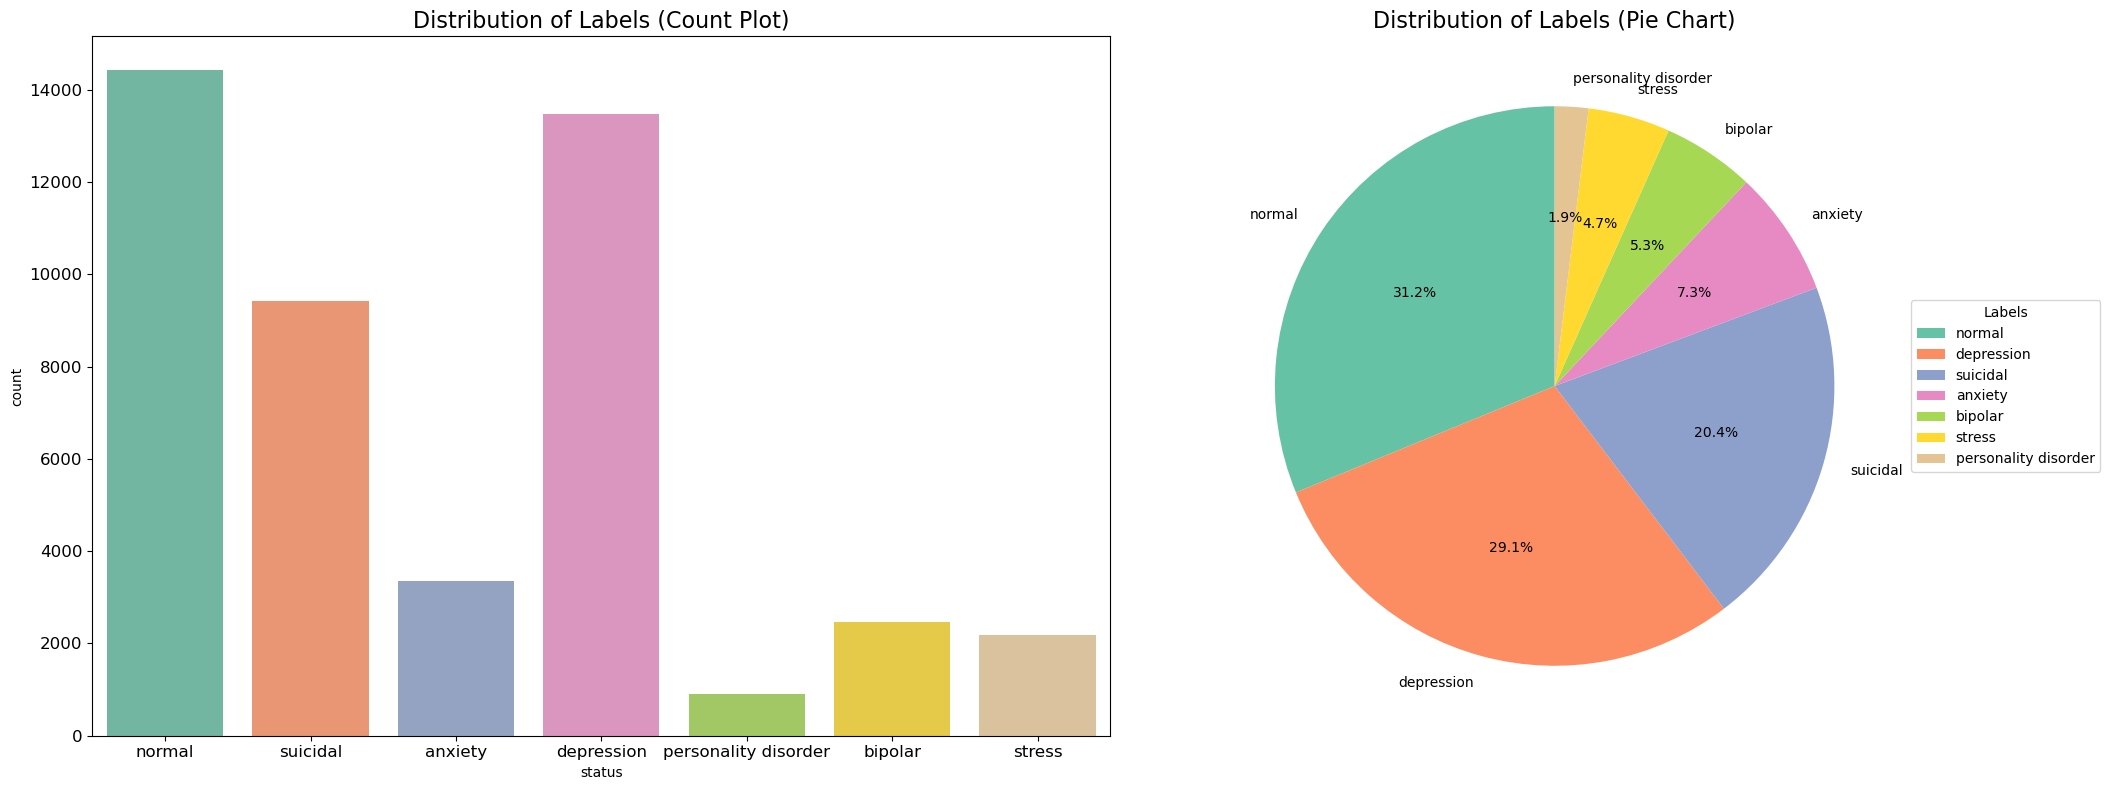

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Count Plot on the left
sns.countplot(data=df, x='status', palette='Set2', ax=ax[0])
ax[0].set_title('Distribution of Labels (Count Plot)', fontsize=16)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# Pie Chart on the right
label_counts = df['status'].value_counts()
wedges, texts, autotexts = ax[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
          colors=sns.color_palette('Set2', len(label_counts)), startangle=90)

# Add a legend to the pie chart
ax[1].legend(wedges, label_counts.index, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('Distribution of Labels (Pie Chart)', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

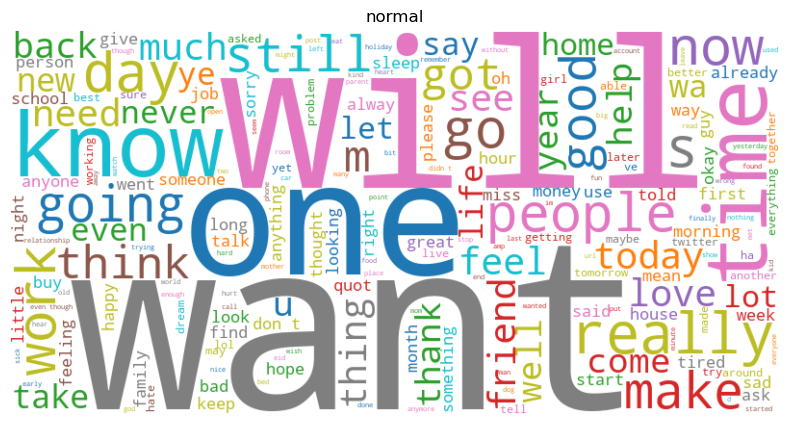

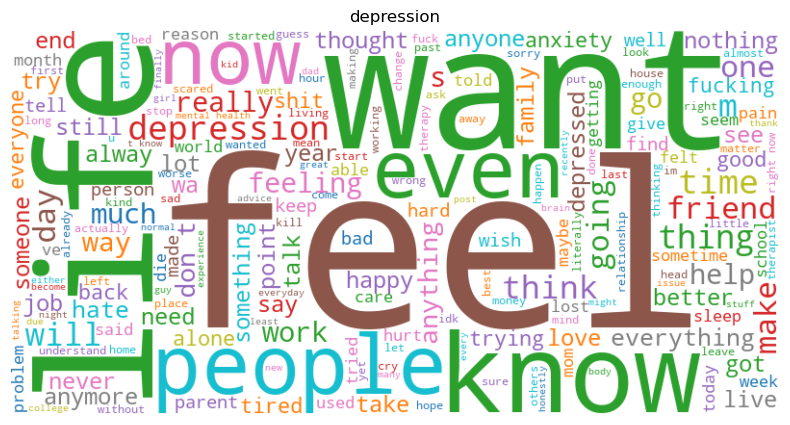

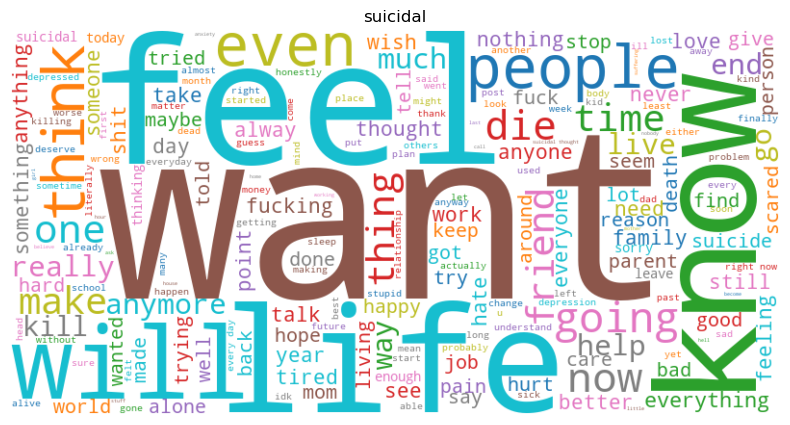

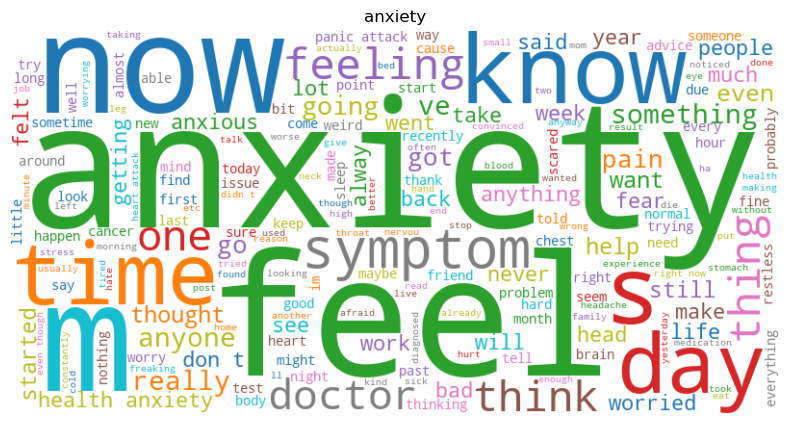

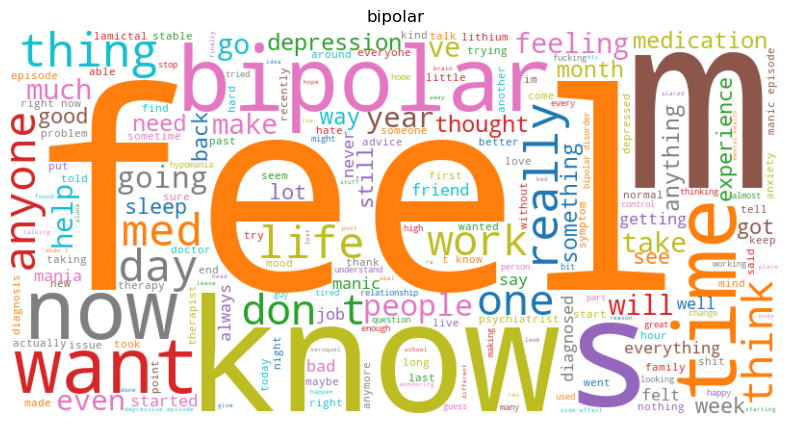

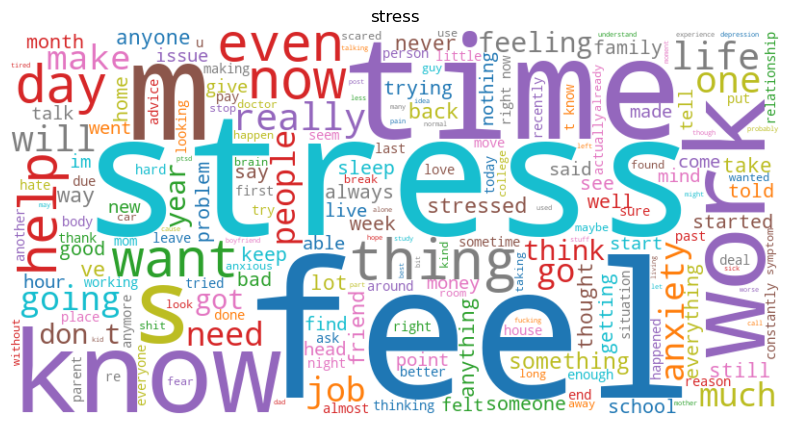

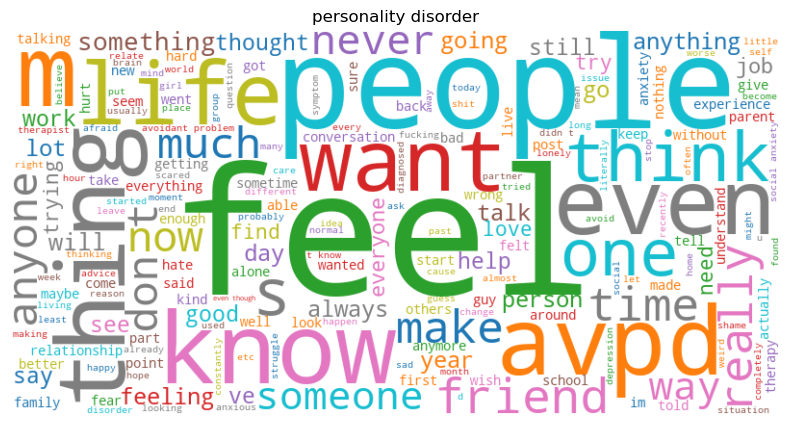

In [43]:
categories = df['status'].value_counts().index

for cat in categories:
    statements = " ".join(df[df['status'] == cat]['statement'])

    wordcloud = WordCloud(width=800, height=400,  colormap="tab10", background_color="white").generate(statements)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

In [45]:
def clean_and_tokenize(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_tokens

In [47]:
category_word_counts = {}

In [49]:
# Process each mental illness category
for category in df['Mental_Illness_Category'].unique():
    all_words = []
    statements = df[df['Mental_Illness_Category'] == category]['statement'].dropna()
    for statement in statements:
        all_words.extend(clean_and_tokenize(statement))
    category_word_counts[category] = Counter(all_words).most_common(15)

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\1170044804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\1170044804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\1170044804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
C:\Users\abcd\AppDa

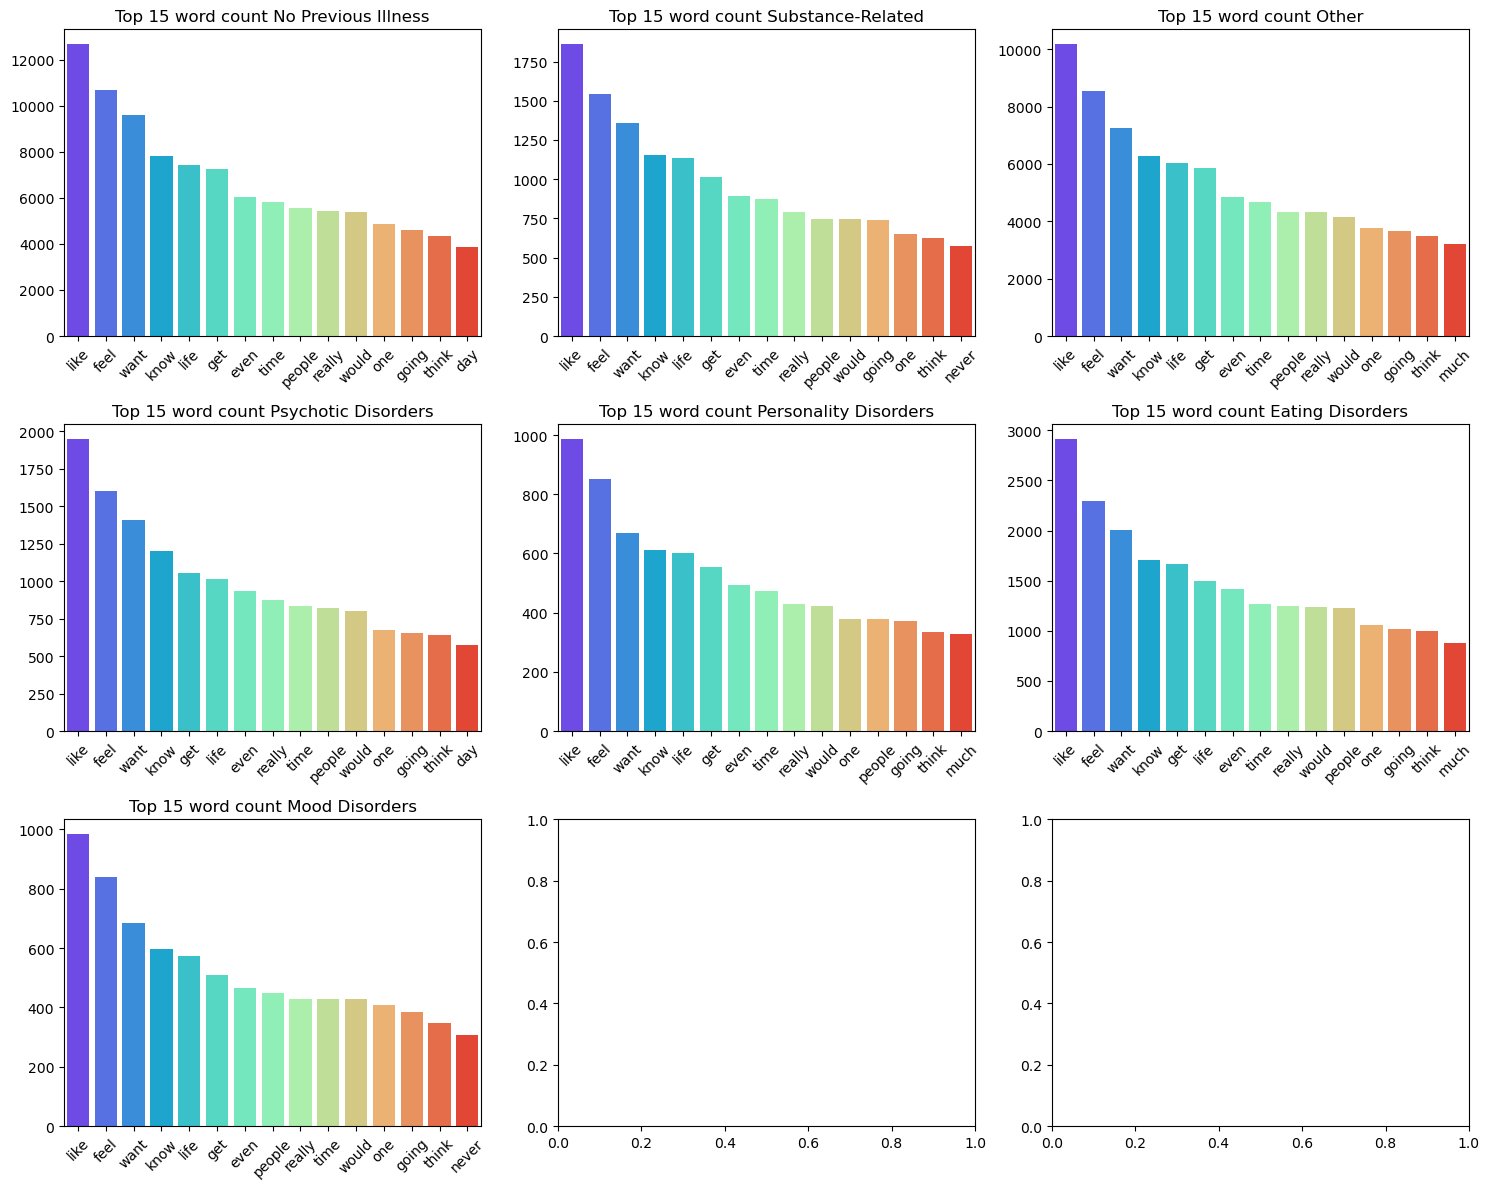

In [50]:
# Plot the top 15 words for each category
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, (category, word_counts) in enumerate(category_word_counts.items()):
    words, counts = zip(*word_counts)
    sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
    axes[idx].set_title(f"Top 15 word count {category}")
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\816069909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['text_length'])


<Axes: xlabel='text_length', ylabel='Density'>

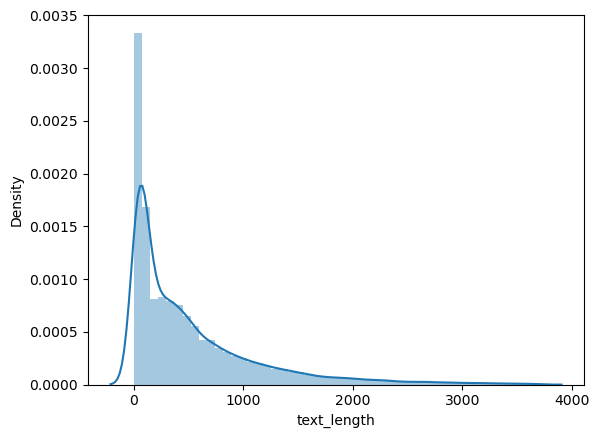

In [51]:
sns.distplot(df['text_length'])

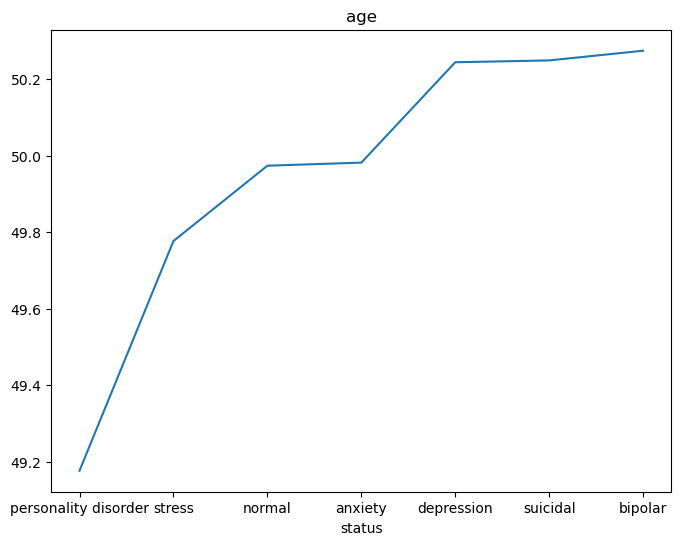

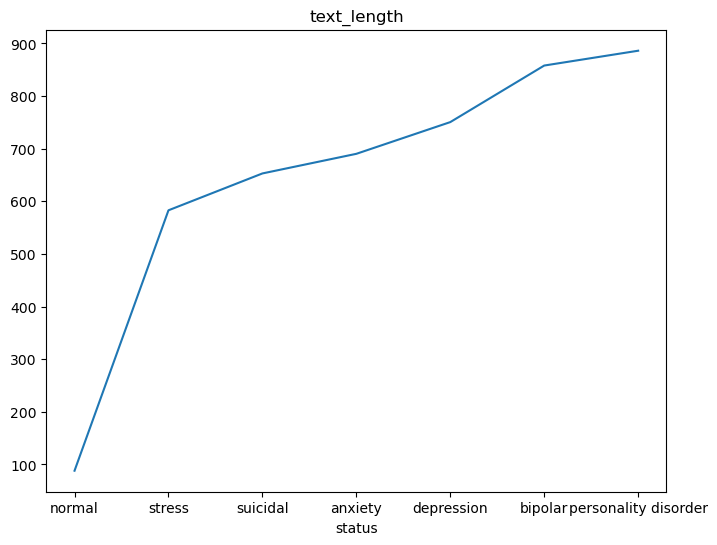

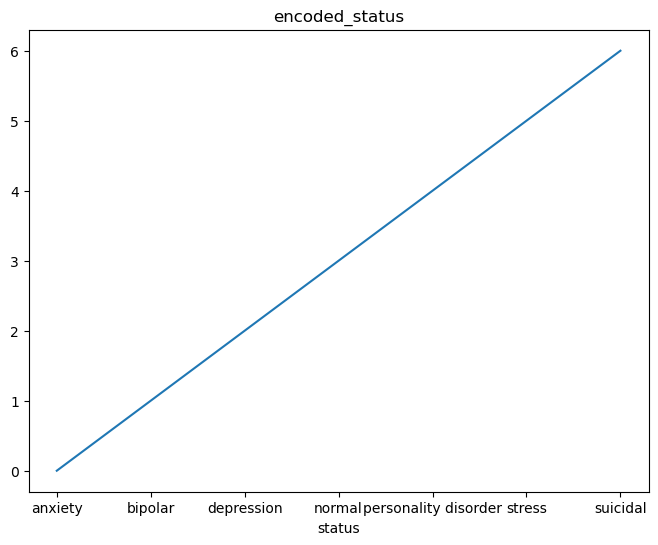

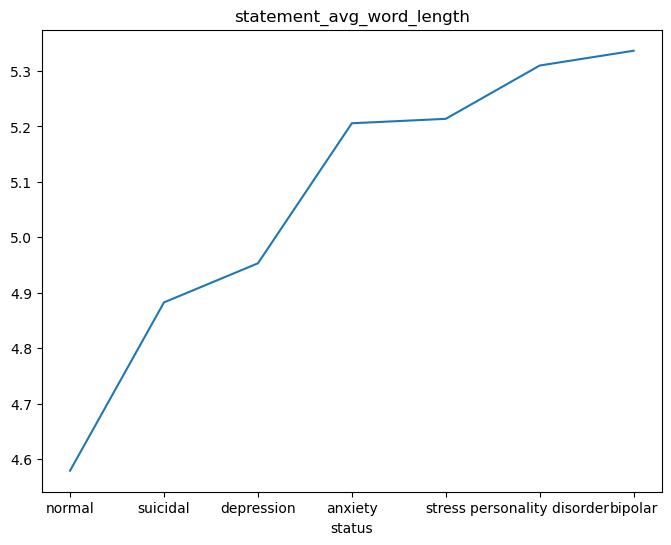

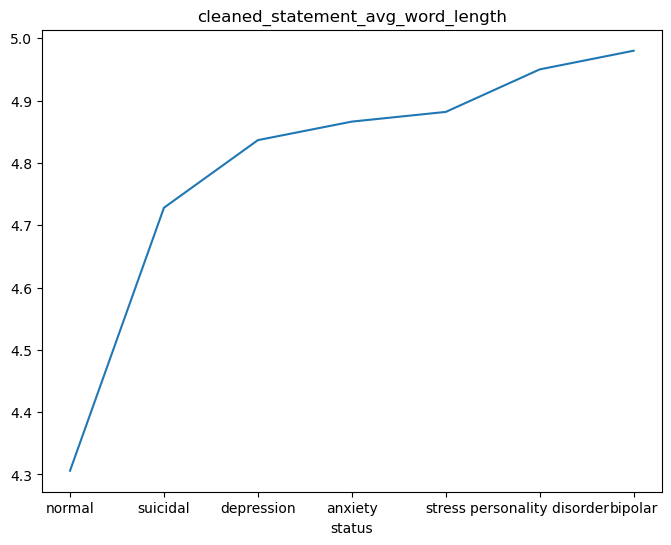

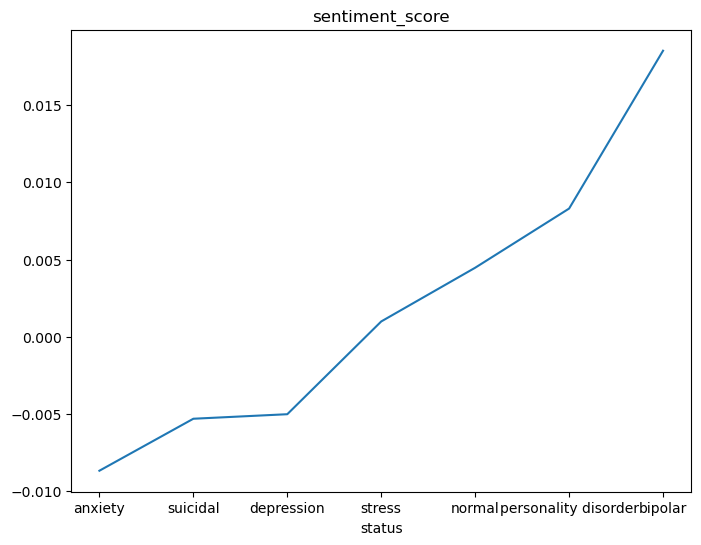

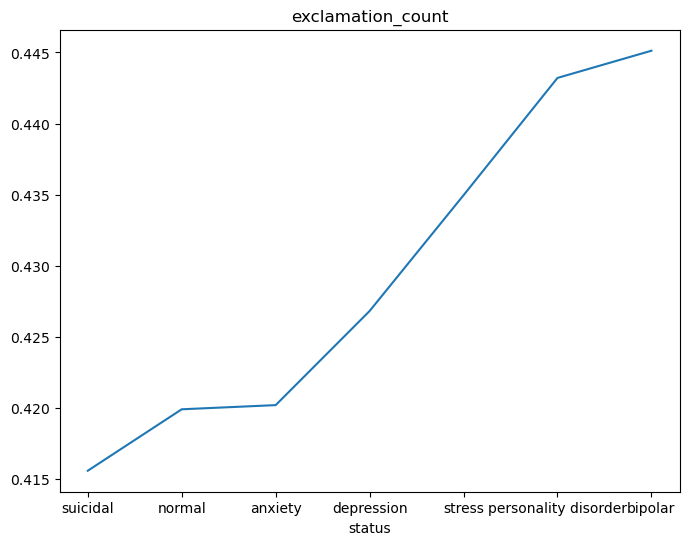

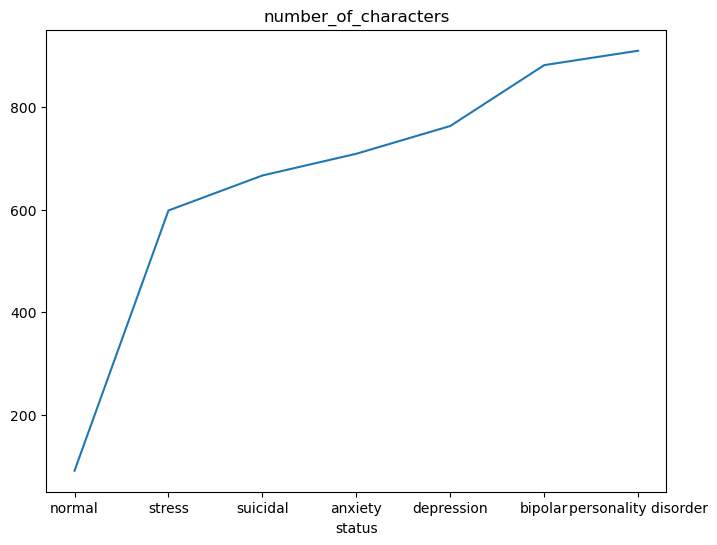

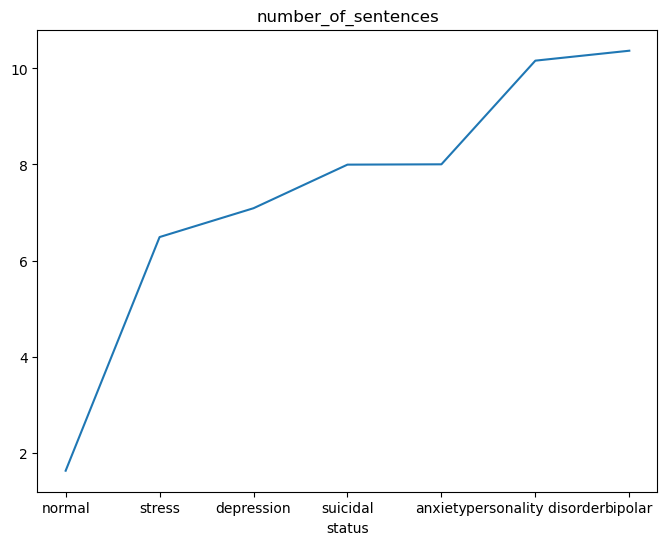

TypeError: category dtype does not support aggregation 'mean'

<Figure size 800x600 with 0 Axes>

In [55]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

numeric_feature


for feature in numeric_feature:
    plt.figure(figsize= (8,6))
    df.groupby('status')[feature].mean().sort_values().plot()
    plt.title(feature)
    plt.show()

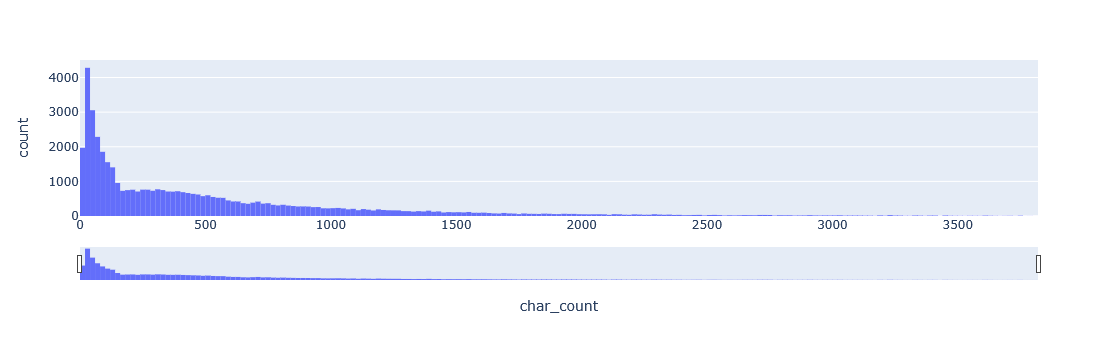

In [57]:
def sentence_count(x):
    return nltk.sent_tokenize(x)
df["char_count"] = df["statement"].str.len()
df["sentences"] = df["statement"].apply(sentence_count)
df["sentence_count"] = df["sentences"].str.len()
fig = px.histogram(df, x="char_count")
fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True,
            autorange = True
        )
    )
)
fig.show()

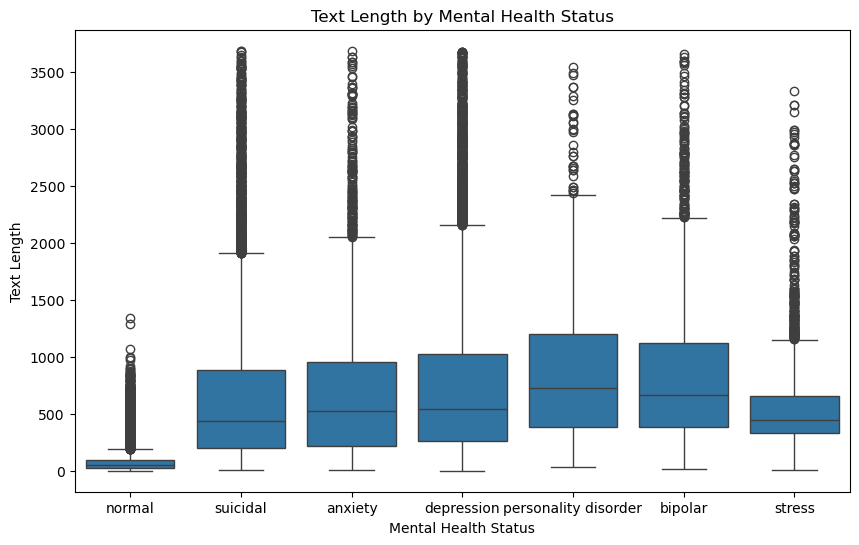

Correlation Matrix:
                text_length  status_numeric
text_length        1.000000       -0.041991
status_numeric    -0.041991        1.000000


In [59]:
# Convert categorical labels to numeric
df['status_numeric'] = pd.Categorical(df['status']).codes

# Plot the relationship between text length and status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='text_length')
plt.title('Text Length by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Text Length')
plt.show()

# Compute correlation matrix
correlation_matrix = df[['text_length', 'status_numeric']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

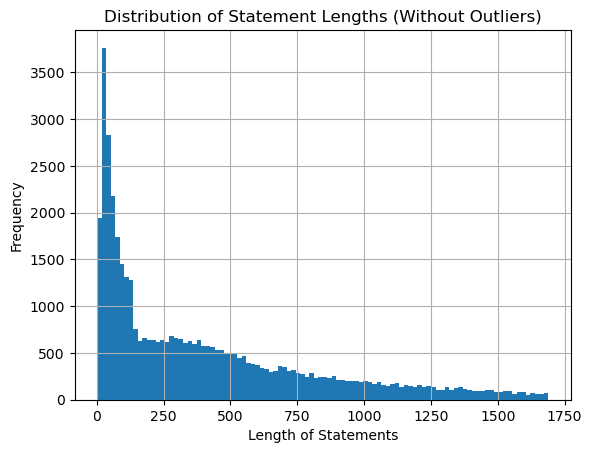

In [61]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['text_length'] >= lower_bound) & (df['text_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['text_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

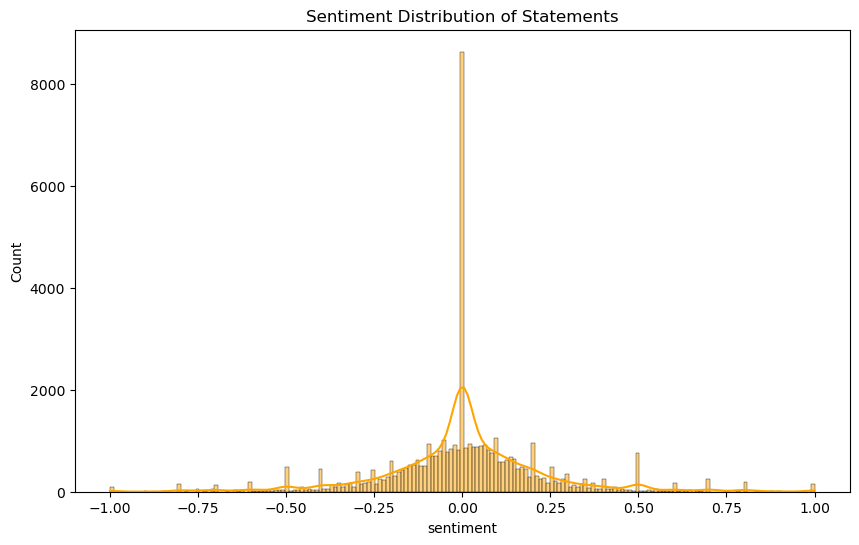

In [63]:
from textblob import TextBlob

# Apply sentiment analysis to each statement
df['sentiment'] = df['statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], kde=True, color='orange')
plt.title('Sentiment Distribution of Statements')
plt.show()

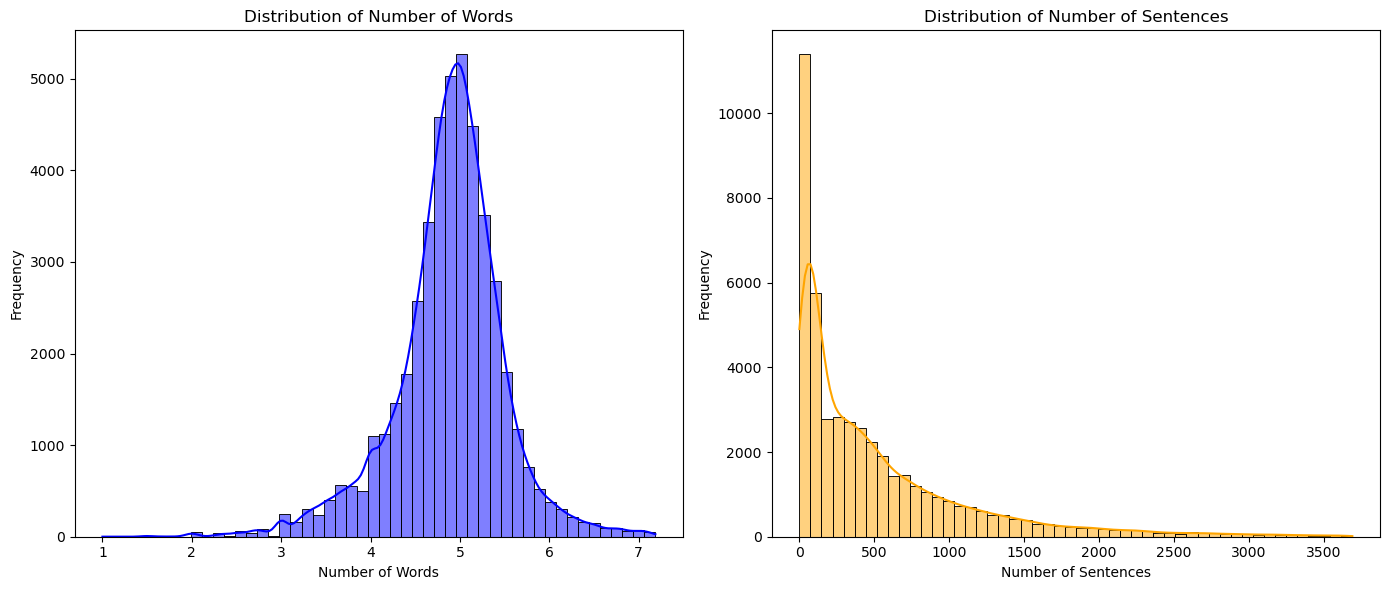

In [64]:
plt.figure(figsize=(14, 6))

# Histogram for number of words
plt.subplot(1, 2, 1)
sns.histplot(df['statement_avg_word_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for number of sentences
plt.subplot(1, 2, 2)
sns.histplot(df['text_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

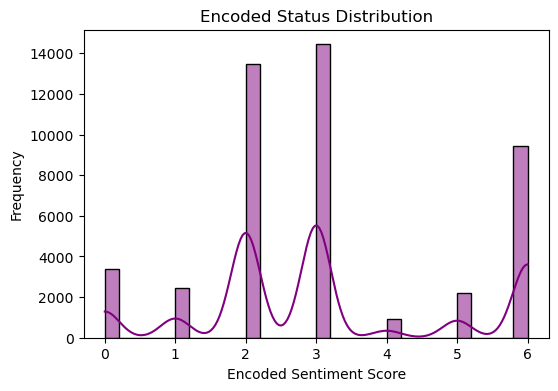

In [65]:
if 'encoded_status' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['encoded_status'], bins=30, kde=True, color='purple')
    plt.title("Encoded Status Distribution")
    plt.xlabel("Encoded Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()


📌 Statement Length Stats:
count    46270.000000
mean       104.196304
std        122.769622
min          1.000000
25%         15.000000
50%         62.000000
75%        145.000000
max        790.000000
Name: statement_length, dtype: float64


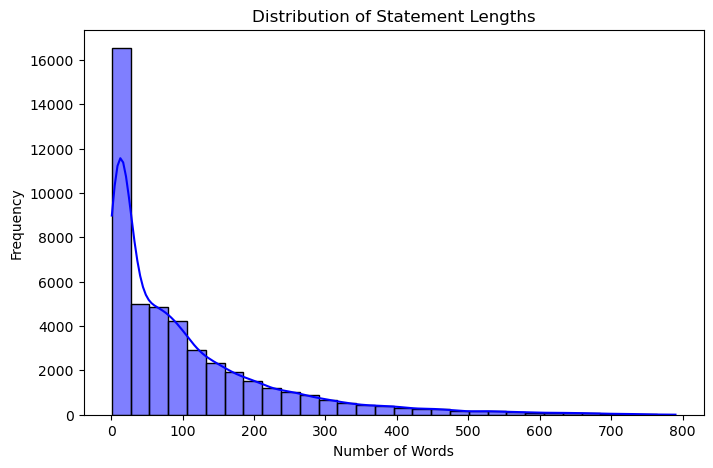

In [69]:
if 'statement' in df.columns:
    print("\n📌 Statement Length Stats:")
    df['statement_length'] = df['statement'].apply(lambda x: len(str(x).split()))
    print(df['statement_length'].describe())

    plt.figure(figsize=(8, 5))
    sns.histplot(df['statement_length'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Statement Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

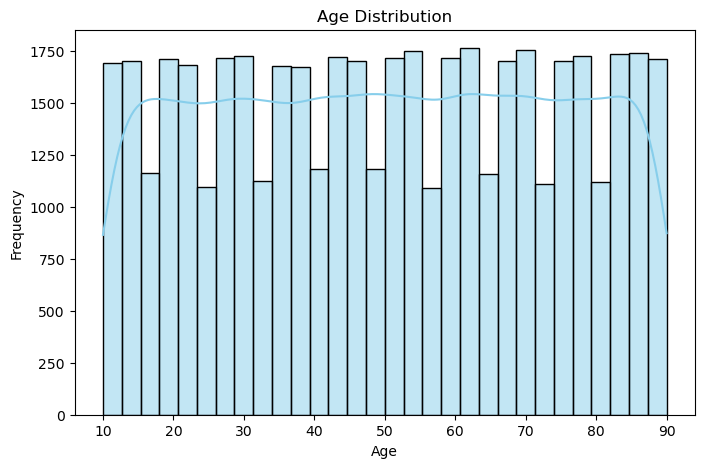

In [71]:
if 'age' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\1579816150.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




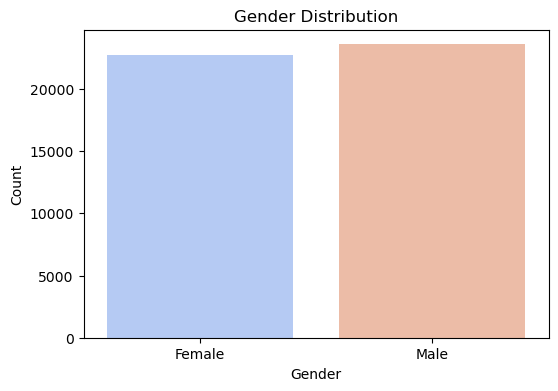

In [73]:
if 'gender' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['gender'], palette='coolwarm')
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\300434056.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




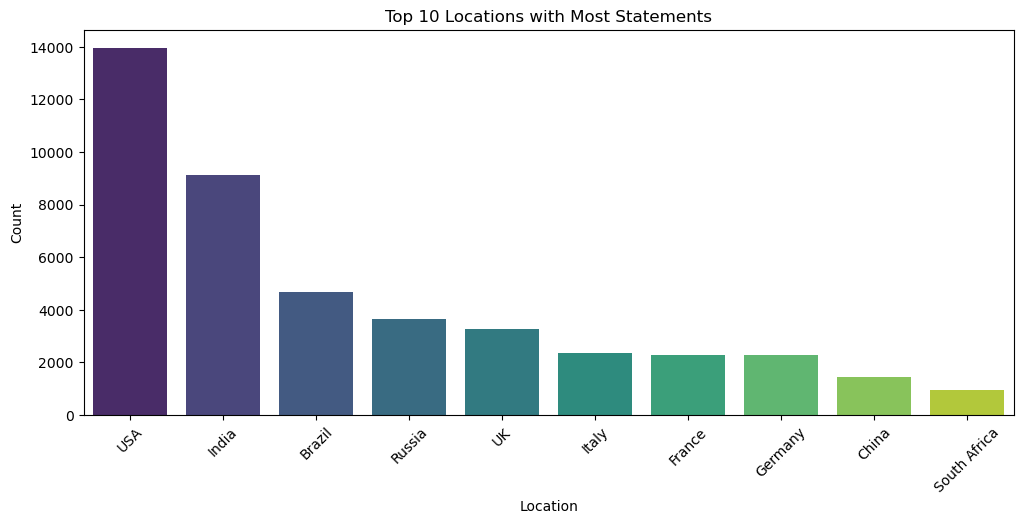

In [75]:
if 'location' in df.columns:
    plt.figure(figsize=(12, 5))
    top_locations = df['location'].value_counts().head(10)
    sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Top 10 Locations with Most Statements")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\239391206.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




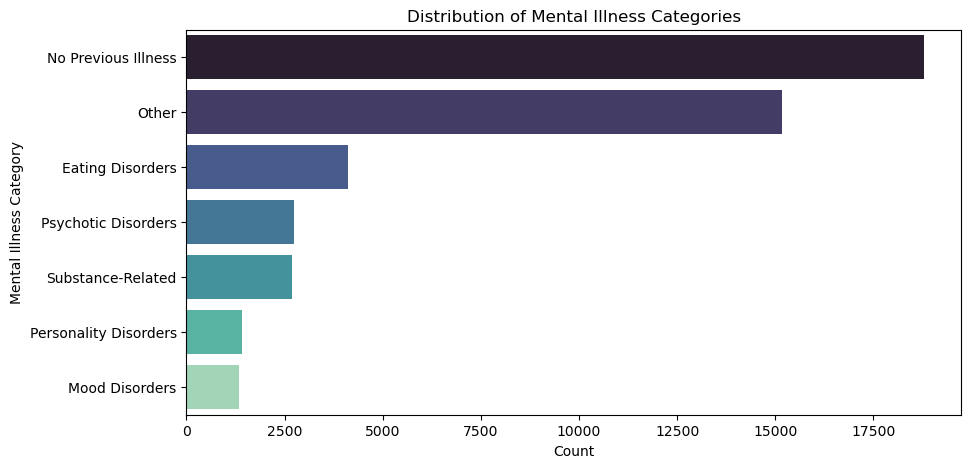

In [77]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Mental_Illness_Category'], order=df['Mental_Illness_Category'].value_counts().index, palette="mako")
plt.title("Distribution of Mental Illness Categories")
plt.xlabel("Count")
plt.ylabel("Mental Illness Category")
plt.show()

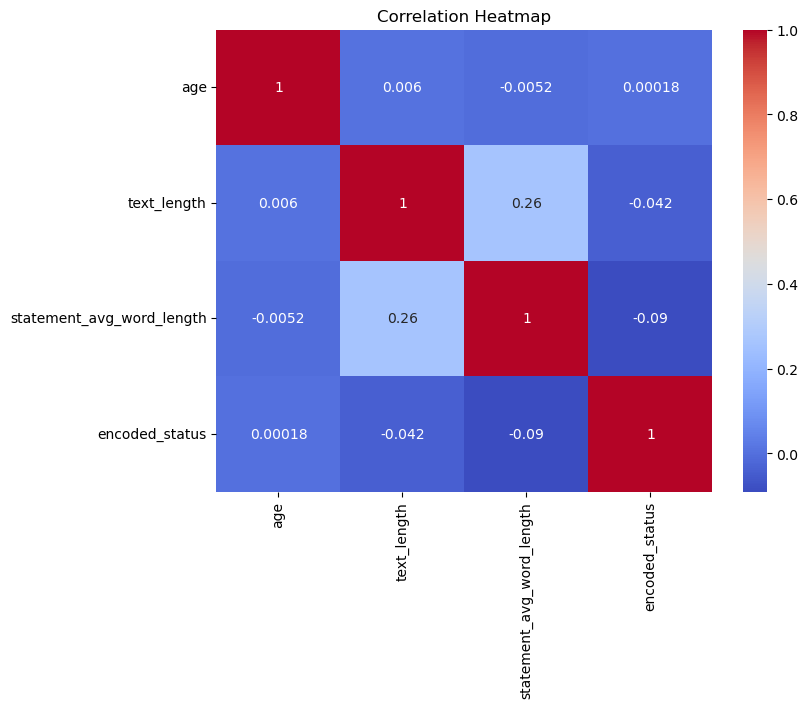

In [79]:
# Heatmap of numerical correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'text_length', 'statement_avg_word_length', 'encoded_status']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\2700332367.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




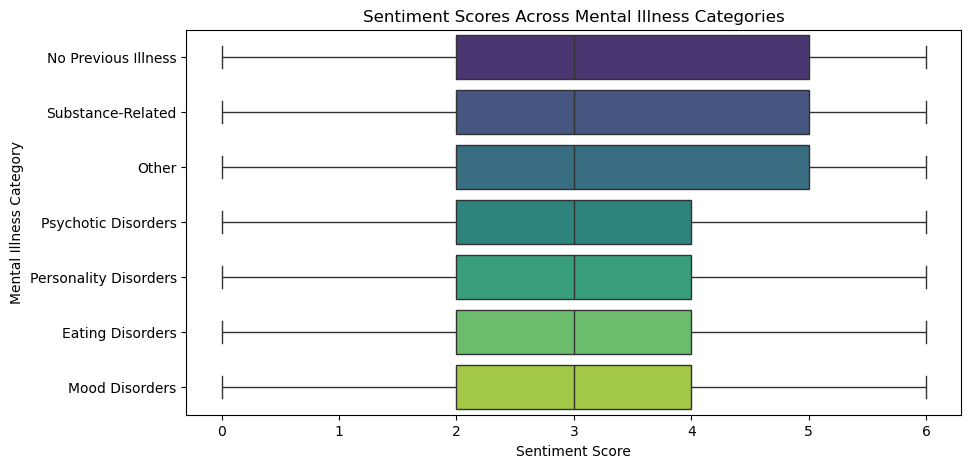

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['Mental_Illness_Category'], x=df['encoded_status'], palette='viridis')
plt.title("Sentiment Scores Across Mental Illness Categories")
plt.xlabel("Sentiment Score")
plt.ylabel("Mental Illness Category")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\1127867473.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




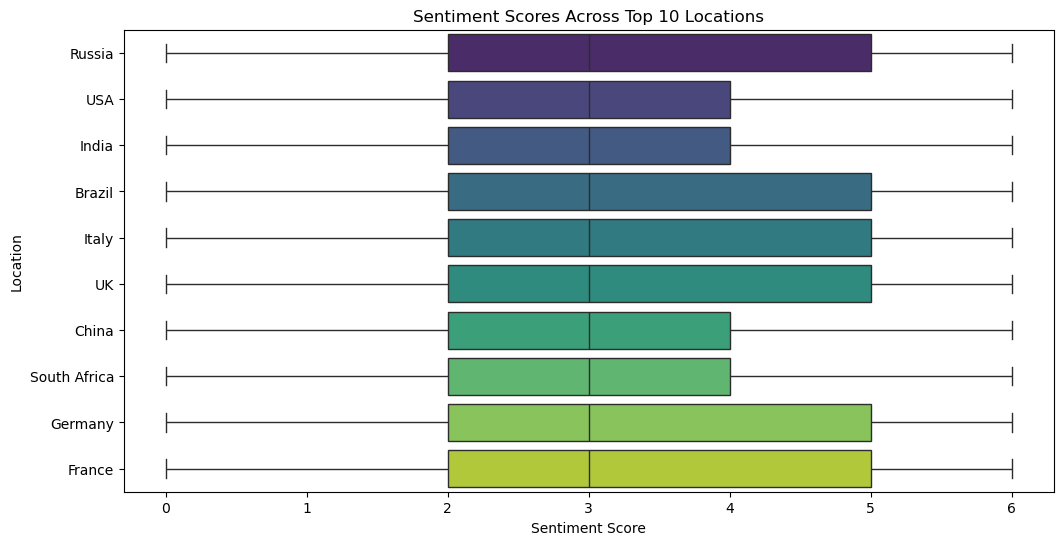

In [83]:
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().nlargest(10).index
sns.boxplot(y=df[df['location'].isin(top_locations)]['location'], x=df['encoded_status'], palette="viridis")
plt.title("Sentiment Scores Across Top 10 Locations")
plt.xlabel("Sentiment Score")
plt.ylabel("Location")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\3029078635.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




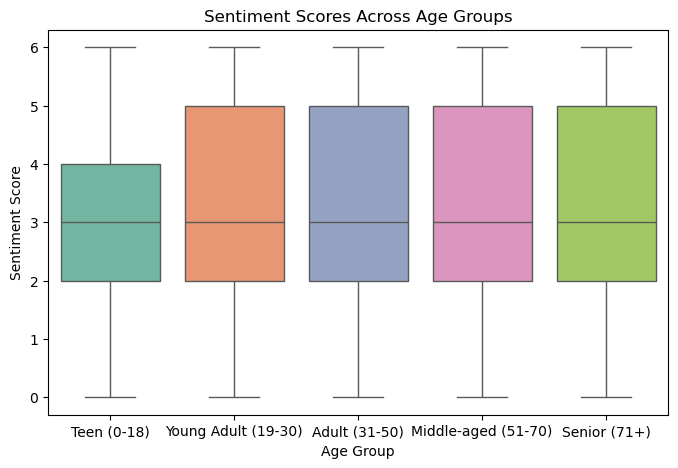

In [85]:
# Define Age Groups
bins = [0, 18, 30, 50, 70, 100]
labels = ['Teen (0-18)', 'Young Adult (19-30)', 'Adult (31-50)', 'Middle-aged (51-70)', 'Senior (71+)']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot Sentiment Score by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age_group'], y=df['encoded_status'], palette="Set2")
plt.title("Sentiment Scores Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Sentiment Score")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\843116101.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




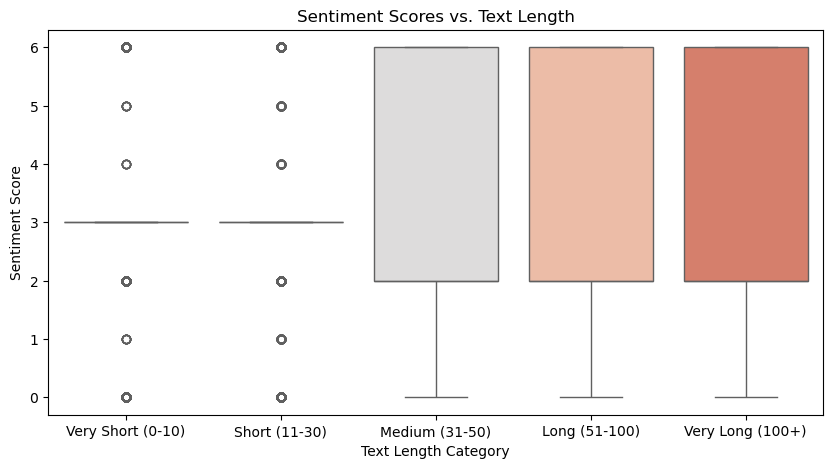

In [87]:
# Categorizing Text Length
df['text_length_category'] = pd.cut(df['statement_length'],
                                    bins=[0, 10, 30, 50, 100, 200],
                                    labels=['Very Short (0-10)', 'Short (11-30)', 'Medium (31-50)', 'Long (51-100)', 'Very Long (100+)'])

# Boxplot for Sentiment vs Text Length
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['text_length_category'], y=df['encoded_status'], palette="coolwarm")
plt.title("Sentiment Scores vs. Text Length")
plt.xlabel("Text Length Category")
plt.ylabel("Sentiment Score")
plt.show()

In [89]:
# Generate Word Cloud for the text data
text_data = ' '.join(df['statement'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(text_data)

In [91]:
# Most common words analysis
stop_words = set(stopwords.words('english'))
all_words = word_tokenize(text_data.lower())
filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\2015097689.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




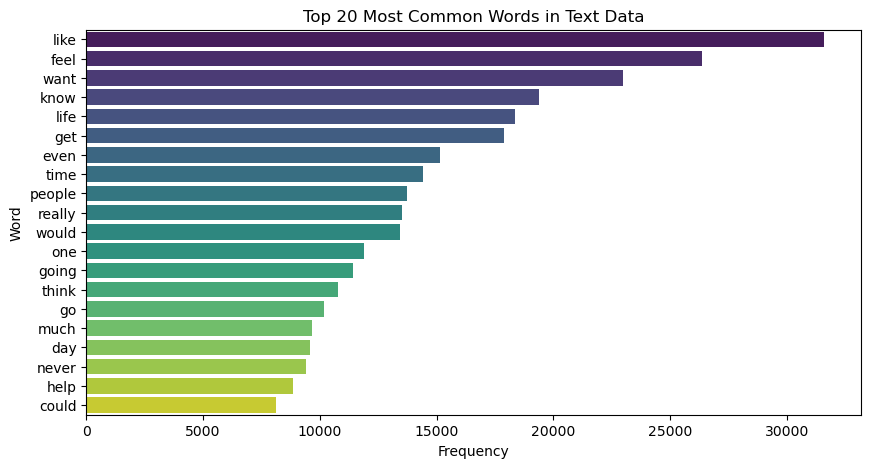

In [92]:
# Plot most common words
plt.figure(figsize=(10, 5))
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words in Text Data')
plt.show()

In [95]:
# Bi-gram and Tri-gram Analysis
def get_ngrams(text, n=2):
    words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]
    return list(nltk.ngrams(words, n))

bigrams = get_ngrams(text_data, 2)
trigrams = get_ngrams(text_data, 3)

bigram_counts = Counter(bigrams).most_common(15)
trigram_counts = Counter(trigrams).most_common(15)

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\190669552.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




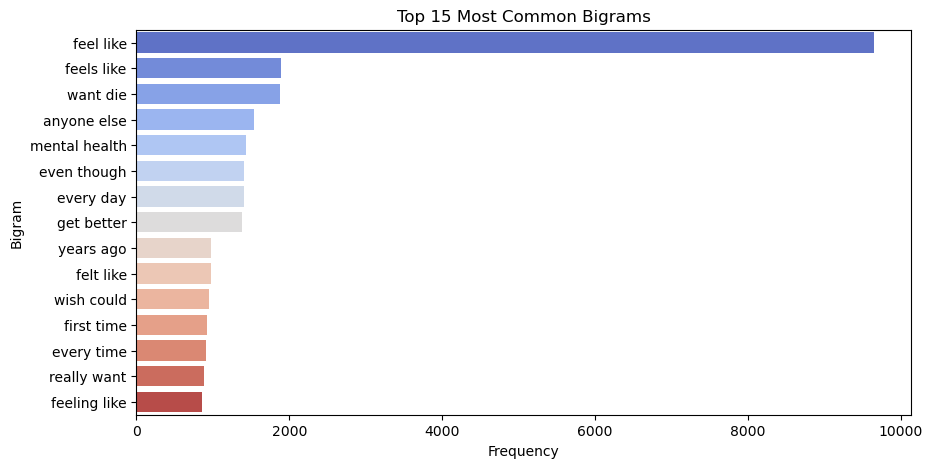

In [96]:
# Plot bigrams
plt.figure(figsize=(10, 5))
bigram_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Frequency'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='coolwarm')
plt.title('Top 15 Most Common Bigrams')
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\3360990782.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




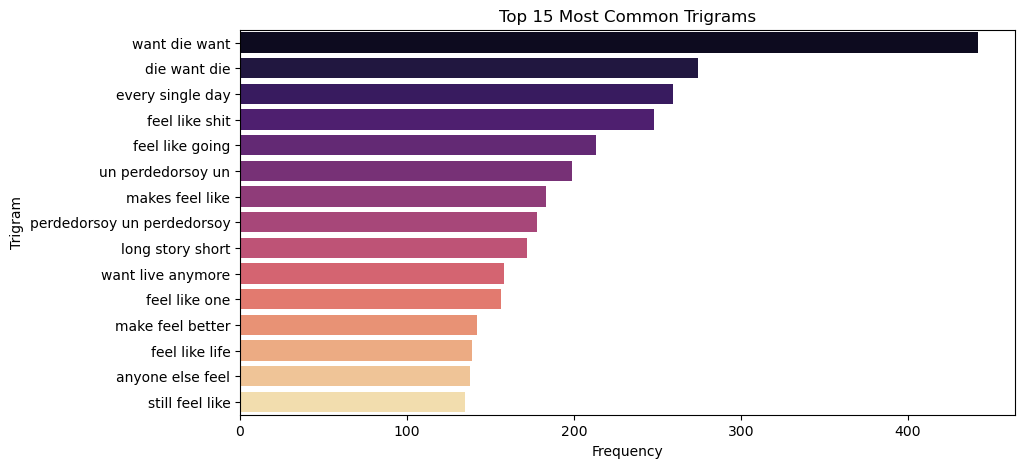

In [97]:
# Plot trigrams
plt.figure(figsize=(10, 5))
trigram_df = pd.DataFrame(trigram_counts, columns=['Trigram', 'Frequency'])
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='magma')
plt.title('Top 15 Most Common Trigrams')
plt.show()

In [98]:
# TF-IDF Analysis
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['statement'].dropna())
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17032\1703388354.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




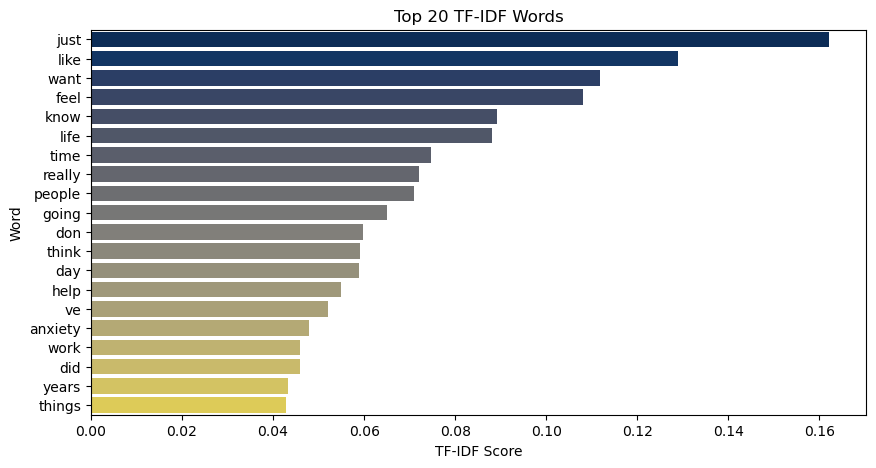

In [99]:
# Plot TF-IDF scores
plt.figure(figsize=(10, 5))
tfidf_df = pd.DataFrame({'Word': tfidf_feature_names, 'TF-IDF Score': tfidf_values})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)
sns.barplot(x='TF-IDF Score', y='Word', data=tfidf_df, palette='cividis')
plt.title('Top 20 TF-IDF Words')
plt.show()

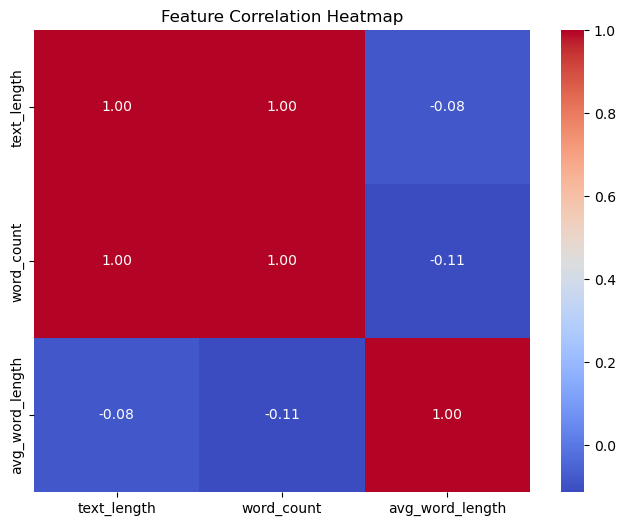

In [101]:
corr = df[['text_length', 'word_count', 'avg_word_length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

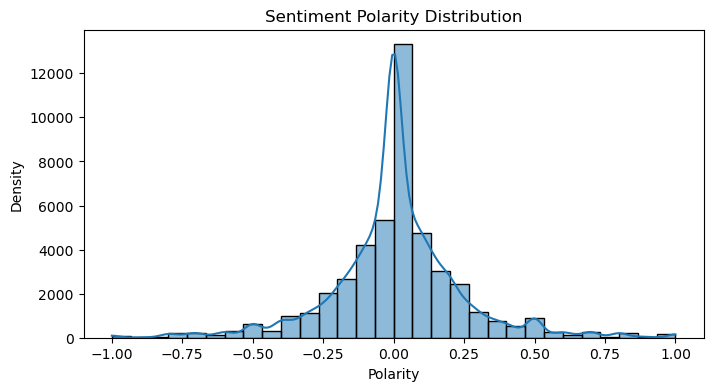

In [107]:
from textblob import TextBlob

df['polarity'] = df['statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['statement'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Polarity Distribution Plot
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['polarity'], kde=True, bins=30)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Density")
plt.show()

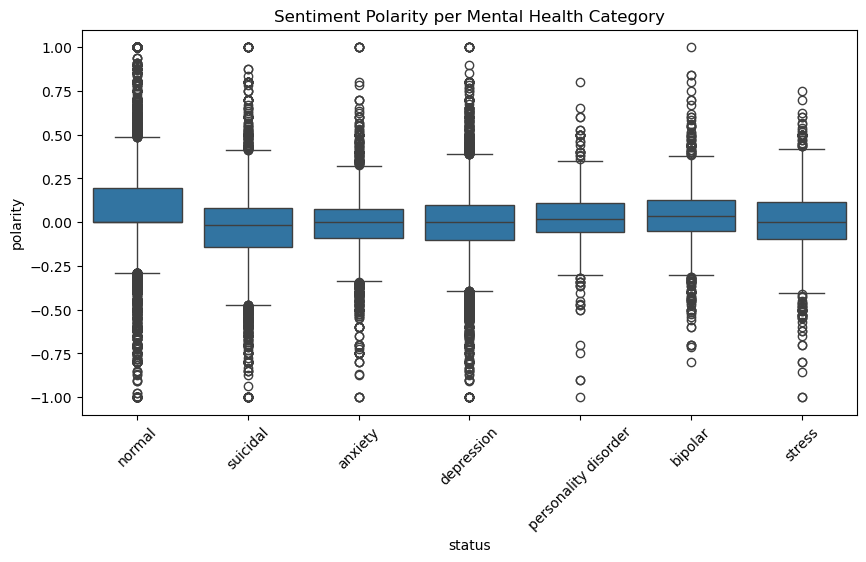

In [108]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['status'], y=df['polarity'])
plt.title("Sentiment Polarity per Mental Health Category")
plt.xticks(rotation=45)
plt.show()

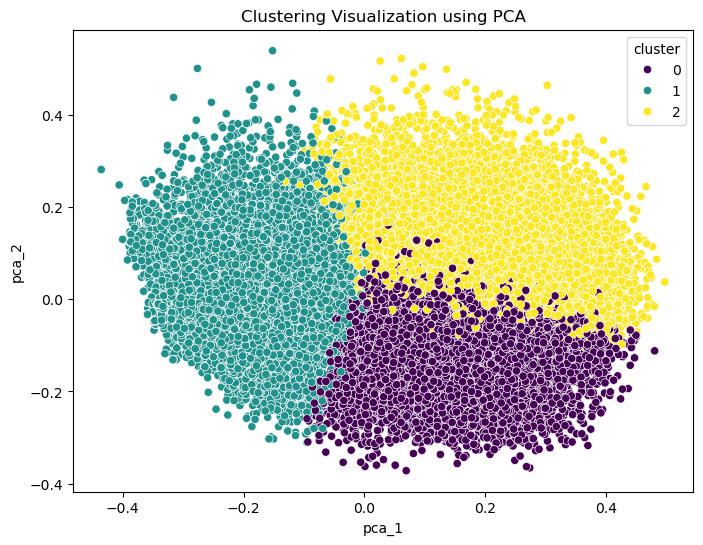

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['statement'].dropna())
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Ensure that we only use rows that were processed by TF-IDF
df_valid = df.loc[df['statement'].notna()].copy()  # Only keep non-null rows
X_valid = vectorizer.fit_transform(df_valid['statement'])  # Fit TF-IDF on the same subset

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_valid['cluster'] = kmeans.fit_predict(X_valid)

# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_valid.toarray())

df_valid['pca_1'] = pca_result[:, 0]
df_valid['pca_2'] = pca_result[:, 1]

# Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_valid['pca_1'], y=df_valid['pca_2'], hue=df_valid['cluster'], palette='viridis')
plt.title("Clustering Visualization using PCA")
plt.show()